# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Regression
### VIDEO: Logistic regression
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

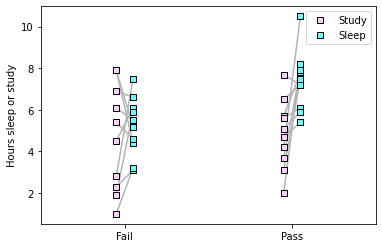

In [2]:
## generate the data

exam_outcome = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
study_hours  = [7.9, 7.9, 2.8, 5.4, 6.1, 4.5, 6.9, 2.3, 1.9, 1, 3.1, 5.7,
                5.6, 4.7, 4.2, 2, 7.7, 6.5, 5.1, 3.7]
sleep_hours  = [4.4, 5.2, 7.5, 4.6, 5.5, 6.1, 6.6, 3.1, 5.9, 3.2, 7.5, 7.8,
                6.1, 5.4, 10.5, 8.2, 7.2, 7.2, 5.9, 7.9]
n = len(exam_outcome)

# and plot them
# loop for drawing lines between squares
for i in range(n):
    plt.plot([exam_outcome[i] - 0.05, exam_outcome[i] + 0.05],
             [study_hours[i], sleep_hours[i]], color=[0.7, 0.7, 0.7])
plt.plot(exam_outcome - 0.05*np.ones(n), study_hours, 'ks', markerfacecolor=[1, 0.8, 1],
         label='Study')
plt.plot(exam_outcome + 0.05*np.ones(n), sleep_hours, 'ks', markerfacecolor=[0.39, 1, 1],
         label='Sleep')
plt.xticks([0, 1], labels=('Fail', 'Pass'))
plt.xlim([-0.5, 1.5])
plt.ylabel('Hours sleep or study')
plt.legend()
plt.show()

In [3]:
## now for the logistic regression

# create a model
logregmodel = LogisticRegression(solver='newton-cg')#'liblinear'

# create the design matrix
# notice: no explicitly stated intercept term
desmat = np.vstack((study_hours, sleep_hours)).T

# fitting of the model happend here
logregmodel.fit(desmat, np.array(exam_outcome))
print(logregmodel.intercept_)
print(logregmodel.coef_)

[-7.1649154]
[[0.10794965 1.05178489]]


In [4]:
# compute predictions and accuracy

predvals = logregmodel.predict(desmat) # class labels
predvalsP = logregmodel.predict_proba(desmat) # probability values

print("Let's compare the model's predictions and the observed results")
print(f"Predictions:\n{predvals}")
print(f"Observed results:\n{np.array(exam_outcome)}")

print("\nThe probabilities that the value belongs to 0 and 1")
print(predvalsP)

print(f"\nOverall model score: {logregmodel.score(desmat, np.array(exam_outcome))}")

Let's compare the model's predictions and the observed results
Predictions:
[0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1]
Observed results:
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]

The probabilities that the value belongs to 0 and 1
[[0.84346776 0.15653224]
 [0.69906128 0.30093872]
 [0.26391272 0.73608728]
 [0.85116615 0.14883385]
 [0.67296049 0.32703951]
 [0.56543607 0.43456393]
 [0.37245072 0.62754928]
 [0.97481743 0.02518257]
 [0.68011062 0.31988938]
 [0.9756662  0.0243338 ]
 [0.25766981 0.74233019]
 [0.16052598 0.83947402]
 [0.53606465 0.46393535]
 [0.72669404 0.27330596]
 [0.01296804 0.98703196]
 [0.15767633 0.84232367]
 [0.22458431 0.77541569]
 [0.24794388 0.75205612]
 [0.60081002 0.39918998]
 [0.17601271 0.82398729]]

Overall model score: 0.75


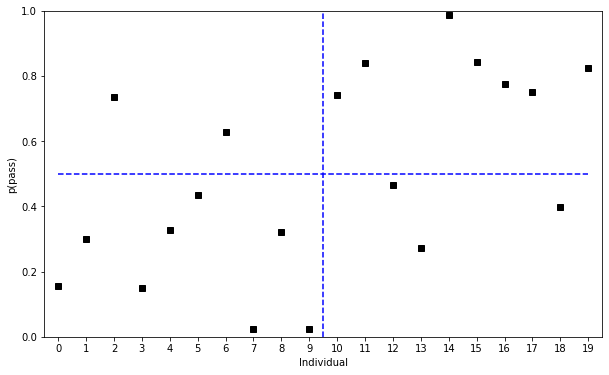

In [5]:
# plotting

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(predvalsP[:, 1], 'ks')
ax.plot([0, 19], [0.5, 0.5], 'b--')
ax.plot([9.5, 9.5], [0, 1], 'b--')
ax.set_xticks(np.arange(20))
ax.set_xlabel('Individual')
ax.set_ylabel('p(pass)')
ax.set_xlim([-0.5, 19.5])
ax.set_ylim([0, 1])
plt.show()